In [2]:
"""
i'm using dataset from: 
http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml
January/2018 - Green taxi.
-- quick cleaning for my own -- 
"""
import numpy as np
import pandas as pd
path='green_tripdata_2018-01.csv'
taxi=pd.read_csv(path)
taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.0,0.0,NaN,0.3,7.3,2,1.0
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.0,0.0,NaN,0.3,15.8,2,1.0
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.0,0.0,NaN,0.3,11.3,2,1.0
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1.0
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.0,0.0,NaN,0.3,4.3,2,1.0


In [3]:
taxi.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [4]:
#check null values
taxi.apply(lambda x: sum(x.isnull()),axis=0)

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag            0
RatecodeID                    0
PULocationID                  0
DOLocationID                  0
passenger_count               0
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                793529
improvement_surcharge         0
total_amount                  0
payment_type                  0
trip_type                     3
dtype: int64

In [5]:
#delete columns/rows with null values and check again
taxi.drop('ehail_fee', axis=1, inplace=True)
taxi=taxi[np.isfinite(taxi['trip_type'])]
taxi.apply(lambda x: sum(x.isnull()),axis=0)

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

In [6]:
#check the range of columns: 
#http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

#taxi['store_and_fwd_flag'].unique() #N, Y
#taxi['VendorID'].unique() #2, 1
#sorted(taxi['RatecodeID'].unique()) #1-6
#sorted(taxi['payment_type'].unique()) #1-6 - lack of 6
#taxi['trip_type'].unique() #1,2
#sorted(taxi['PULocationID'].unique()) #1-265
#sorted(taxi['DOLocationID'].unique()) #1-265
sorted(taxi['passenger_count'].unique())
#oj, we have situations with 0 passengers!

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
len(taxi[taxi.passenger_count==0]) #check how many

170

In [8]:
taxi=taxi[taxi.passenger_count!=0] #there are only few situations
sorted(taxi['passenger_count'].unique()) #...so delete them all.

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
#find too big/too small total_amount (price) -firstly without histogram
mx=taxi['total_amount'].max()
check= lambda x: len(taxi[taxi.total_amount>x])
print("Total: ", len(taxi))
print("Max value: ", mx)
print("Num of total_val > 300: ", check(300))
print("Num of total_val > 200: ", check(200))
print("Num of total_val > 100: ", check(100))
print("Num of total_val > 50: ", check(50))
print('\n')

check2=lambda x: len(taxi[taxi.total_amount<x])
print("Num of total_val < 5: ", check2(5))
print("Num of total_val < 2: ", check2(2))
print("Num of total_val < 1: ", check2(1))

print("\n>100 / total: ", check(100)/len(taxi))
print("\n<2 / total: ", check2(2)/len(taxi))

Total:  793356
Max value:  2126.8
Num of total_val > 300:  20
Num of total_val > 200:  51
Num of total_val > 100:  406
Num of total_val > 50:  9571


Num of total_val < 5:  26833
Num of total_val < 2:  3736
Num of total_val < 1:  3706

>100 / total:  0.0005117500844513686

<2 / total:  0.004709109151503234


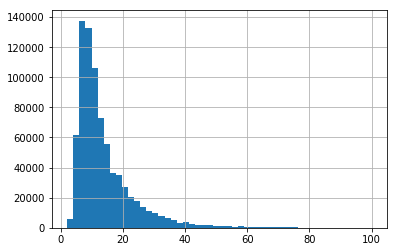

In [10]:
import matplotlib.pyplot as plt
total_amount_limity = [2, 100]
taxi = taxi[(taxi.total_amount.between(total_amount_limity[0], total_amount_limity[1], inclusive=False))]
taxi['total_amount'].hist(bins=50)
plt.show()

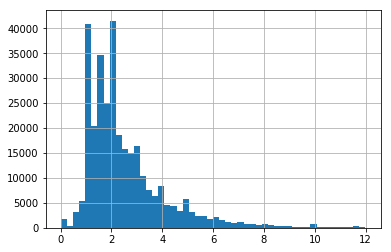

In [11]:
tip_amount_limity = [0, 12]
taxi = taxi[(taxi.tip_amount.between(tip_amount_limity[0], tip_amount_limity[1],
inclusive=False))]
taxi['tip_amount'].hist(bins=50)
plt.show()

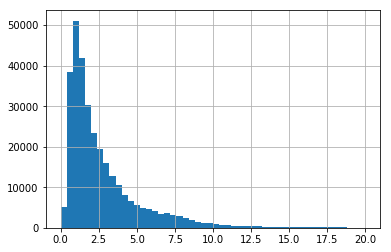

In [12]:
Distance_limity = [0, 20]
taxi = taxi[(taxi.trip_distance.between(Distance_limity[0], Distance_limity[1],inclusive=False))]
taxi['trip_distance'].hist(bins=50)
plt.show()

In [13]:
#make right data type of datetime
taxi["lpep_pickup_datetime"] = pd.to_datetime(taxi["lpep_pickup_datetime"])
taxi["Lpep_dropoff_datetime"] = pd.to_datetime(taxi["lpep_dropoff_datetime"])

In [14]:
len(taxi) # from the start: >700 000

311734

In [16]:
taxi.to_csv('datas.csv')

In [17]:
datas=pd.read_csv('datas.csv')
len(datas)

311734

In [ ]:
"""
my solution - i didn't delete correlations
f.e. total_amount & trip_distance & fare_amount
In real job I have should done this. 
Why? Heat map of correlation with seaborn using... and laziness ;)
"""